In [1]:
import PIL
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstatsπ
from tqdm.notebook import tqdm

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution
from sklearn.mixture import GaussianMixture

# Black-hole binaries formation channels

Let's import the data and plot a histogram of the distribution: I can distinguish 3 modes. If the number of bins is large enough (say > 400) it is possible to see one more mode, but is this true or is this an artifact due to the binning choice?

We can fit the distribution with a Gaussian Mixture model, i. e. a compound model with different gaussians. We know that for gaussians, maximising the loglikelihood is equal to minimizing the $\chi^2$, but that tells us how good is the model. And if we want to compare different models, e.g. with different number of modes?

We need to use the Akaike Information Criterion (AIC) for a certain model $M$:

$$ AIC_M = -2log(L^0(M)) + 2k + \frac{2k(k+1)}{N-k-1} $$

where:

&#10148; $L^0 = \frac{dL}{d\theta} \bigg|_{\hat{\theta}=M} \longrightarrow$ for Gaussians, equal to $\chi^2$

&#10148; N number of data points

&#10148; k number of model parameters

The best model is the one with the lowest AIC $\longrightarrow$ minimize $AIC_M$

1) $1^{st}$ order: minimizing $-log(L^0) \propto \chi^2$ 
2) if all models give same $L^0 \rightarrow 2^{nd}$ and $3^{rd}$ order terms: $2k + \frac{2k(k+1)}{N-k-1} \propto k \Longrightarrow$ models with less parameters are preferred (Occam's razor)

In [2]:
N = np.arange(1,11)
data = np.load("formationchannels.npy")
data
print(len(N), data.shape)

10 (2950, 1)


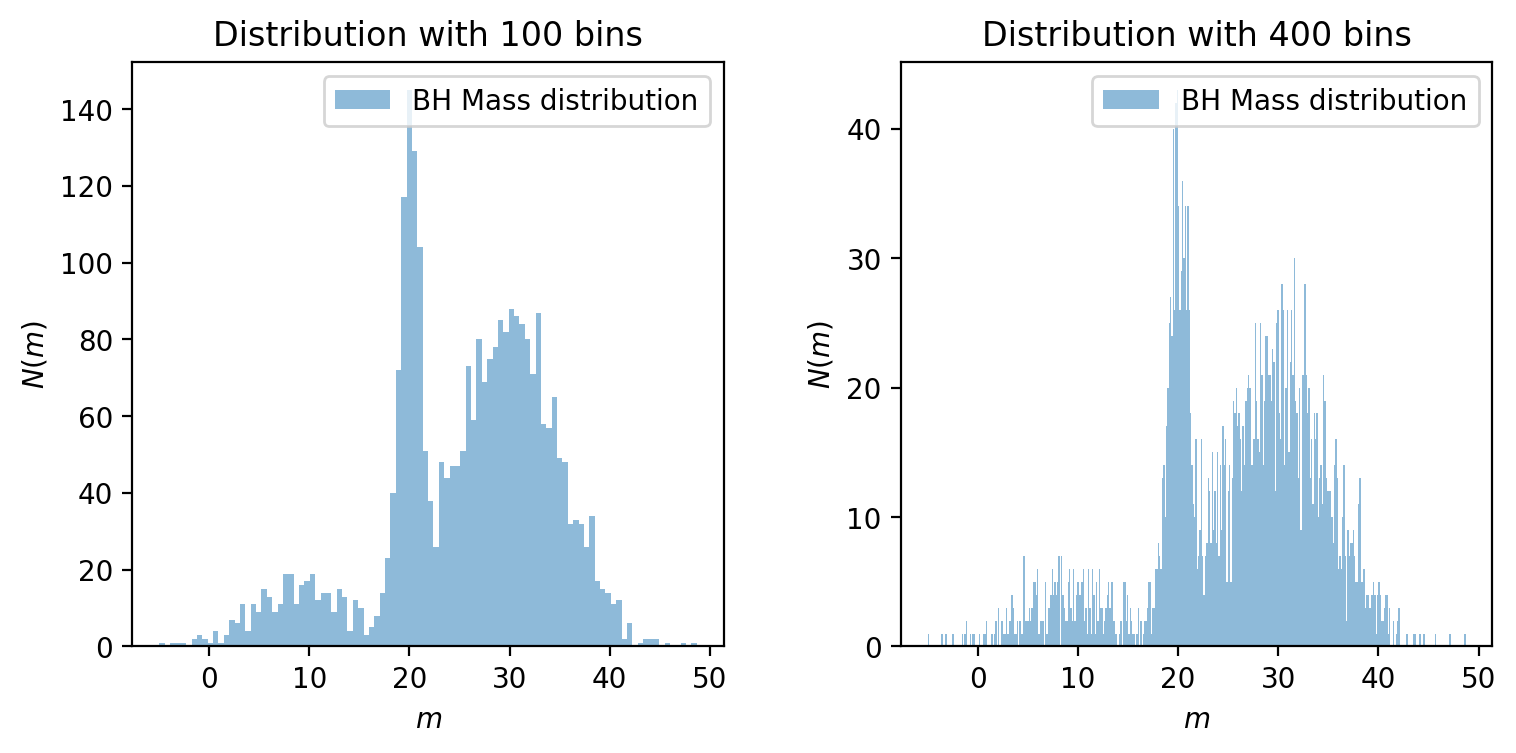

In [3]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(wspace=0.3,hspace=0.3, left=0.1, right=0.95,bottom=0.08, top=0.92)

# plot histograms
ax = fig.add_subplot(221)

#check that they do are normally distributed arround sigma with sigma_err
bin_numb1 = 100
counts, bins, bars = ax.hist(data,bins=bin_numb1, label="BH Mass distribution", alpha=0.5)
ax.set_title("Distribution with "f'{bin_numb1}'" bins")
ax.set_xlabel("$m$")
ax.set_ylabel("$N(m)$")
ax.legend()


ax = fig.add_subplot(222)

bin_numb2 = 400
counts2, bins2, bars2 = ax.hist(data,bins=bin_numb2, label="BH Mass distribution", alpha=0.5)
ax.set_title("Distribution with "f'{bin_numb2}'" bins")
ax.set_xlabel("$m$")
ax.set_ylabel("$N(m)$")
ax.legend()

plt.show()

In [4]:
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(data)
means = gm.means_
print(means)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f905ddb7940>
Traceback (most recent call last):
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[[20.04995136]
 [30.11583146]
 [ 9.09647315]]


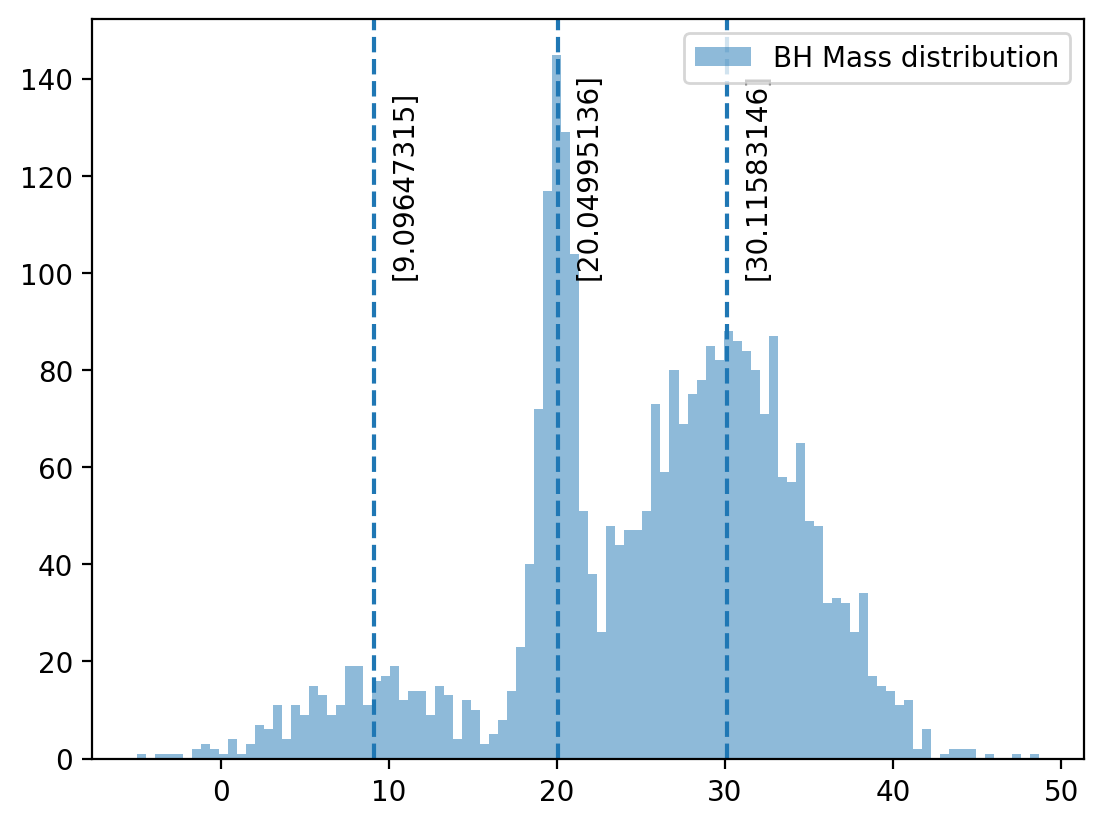

In [5]:
plt.hist(data,bins=100, label="BH Mass distribution", alpha=0.5)
for i in means:
    plt.axvline(x=i, linestyle='dashed')
    plt.text(i+1, 100, f'{i}', rotation=90,size=10)
plt.legend()
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f90782a1040>
Traceback (most recent call last):
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

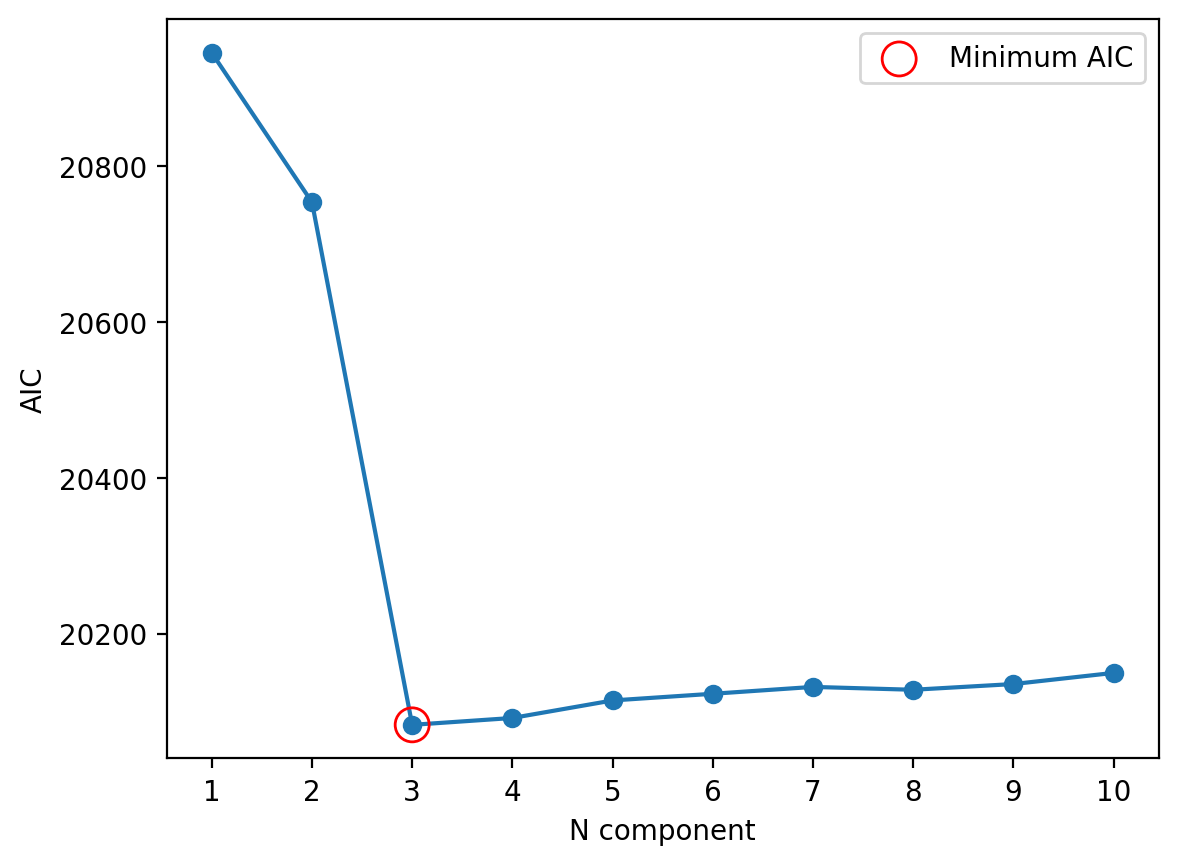

In [6]:
aic_val = []
models = [None for i in range(len(N))]

for i in range(1,len(N)+1):
    gm_N = GaussianMixture(n_components=i, random_state=0)
    models[i-1] = gm_N.fit(data)
    aic_val.append(gm_N.aic(data))
    
plt.plot(N, aic_val)
plt.scatter(N, aic_val)
plt.scatter(3,aic_val[2], s=150, facecolors='none', edgecolors='r', label='Minimum AIC', zorder=2)
plt.xlabel("N component")
plt.ylabel("AIC")
plt.xticks(np.arange(min(N), max(N)+1, 1))
plt.legend()
plt.show()

The best model happens to be the one with three modes:

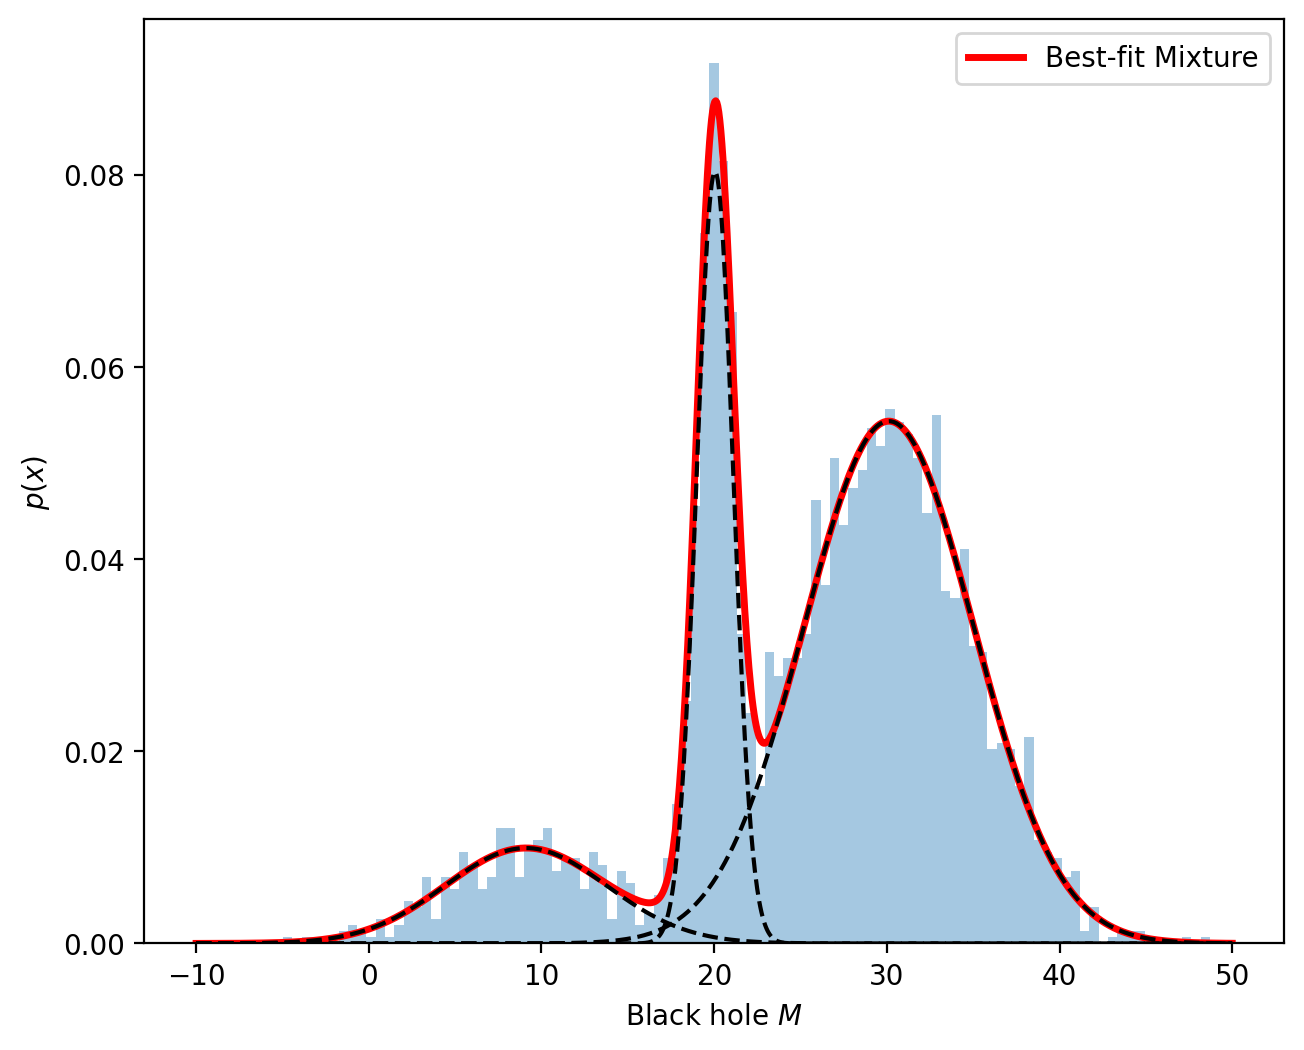

In [7]:
fig = plt.figure(figsize=(25, 6))
#fig.subplots_adjust(left=0.12, right=0.97, bottom=0.21, top=0.9, wspace=0.5)

ax = fig.add_subplot(131)
M_best = models[np.argmin(aic_val)]

x = np.linspace(-10, 50, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))                                   #percentage of contribution respect to the total
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(data, 100, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, 'r',linewidth=2.5, label="Best-fit Mixture")
ax.plot(x, pdf_individual, '--k')
#ax.text(0.04, 0.96, "Best-fit Mixture", ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('Black hole $M$')
ax.set_ylabel('$p(x)$')

plt.legend()
plt.show()

But why do I have to reshape the x array before computing the pdf? It's because scikit-learn wants this type of format

In [8]:
print(x.reshape(-1,1))
print("\n", x)

[[-1.00000000e+01]
 [-9.93993994e+00]
 [-9.87987988e+00]
 [-9.81981982e+00]
 [-9.75975976e+00]
 [-9.69969970e+00]
 [-9.63963964e+00]
 [-9.57957958e+00]
 [-9.51951952e+00]
 [-9.45945946e+00]
 [-9.39939940e+00]
 [-9.33933934e+00]
 [-9.27927928e+00]
 [-9.21921922e+00]
 [-9.15915916e+00]
 [-9.09909910e+00]
 [-9.03903904e+00]
 [-8.97897898e+00]
 [-8.91891892e+00]
 [-8.85885886e+00]
 [-8.79879880e+00]
 [-8.73873874e+00]
 [-8.67867868e+00]
 [-8.61861862e+00]
 [-8.55855856e+00]
 [-8.49849850e+00]
 [-8.43843844e+00]
 [-8.37837838e+00]
 [-8.31831832e+00]
 [-8.25825826e+00]
 [-8.19819820e+00]
 [-8.13813814e+00]
 [-8.07807808e+00]
 [-8.01801802e+00]
 [-7.95795796e+00]
 [-7.89789790e+00]
 [-7.83783784e+00]
 [-7.77777778e+00]
 [-7.71771772e+00]
 [-7.65765766e+00]
 [-7.59759760e+00]
 [-7.53753754e+00]
 [-7.47747748e+00]
 [-7.41741742e+00]
 [-7.35735736e+00]
 [-7.29729730e+00]
 [-7.23723724e+00]
 [-7.17717718e+00]
 [-7.11711712e+00]
 [-7.05705706e+00]
 [-6.99699700e+00]
 [-6.93693694e+00]
 [-6.8768768

In [10]:
x1=np.linspace(0, 5, 6)
y = x1.reshape(-1,1)
print(x1, x1.shape)
print(x1[np.newaxis,:], x1[np.newaxis,:].shape)
print(x1[:,np.newaxis], x1[:,np.newaxis].shape)
print("\n",y,y.shape)

[0. 1. 2. 3. 4. 5.] (6,)
[[0. 1. 2. 3. 4. 5.]] (1, 6)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)

 [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)


##### Try to build an ECDF

In [73]:
ecdf = np.column_stack((bins[:-1], counts))
ecdf[:,1]
ecdf_sort = sorted(ecdf,key=lambda x: x[0])
x = np.array(ecdf_sort)[:,0]
y = np.array(ecdf_sort)[:,1]
y_tot = np.sum(y)
y_tot

2950.0

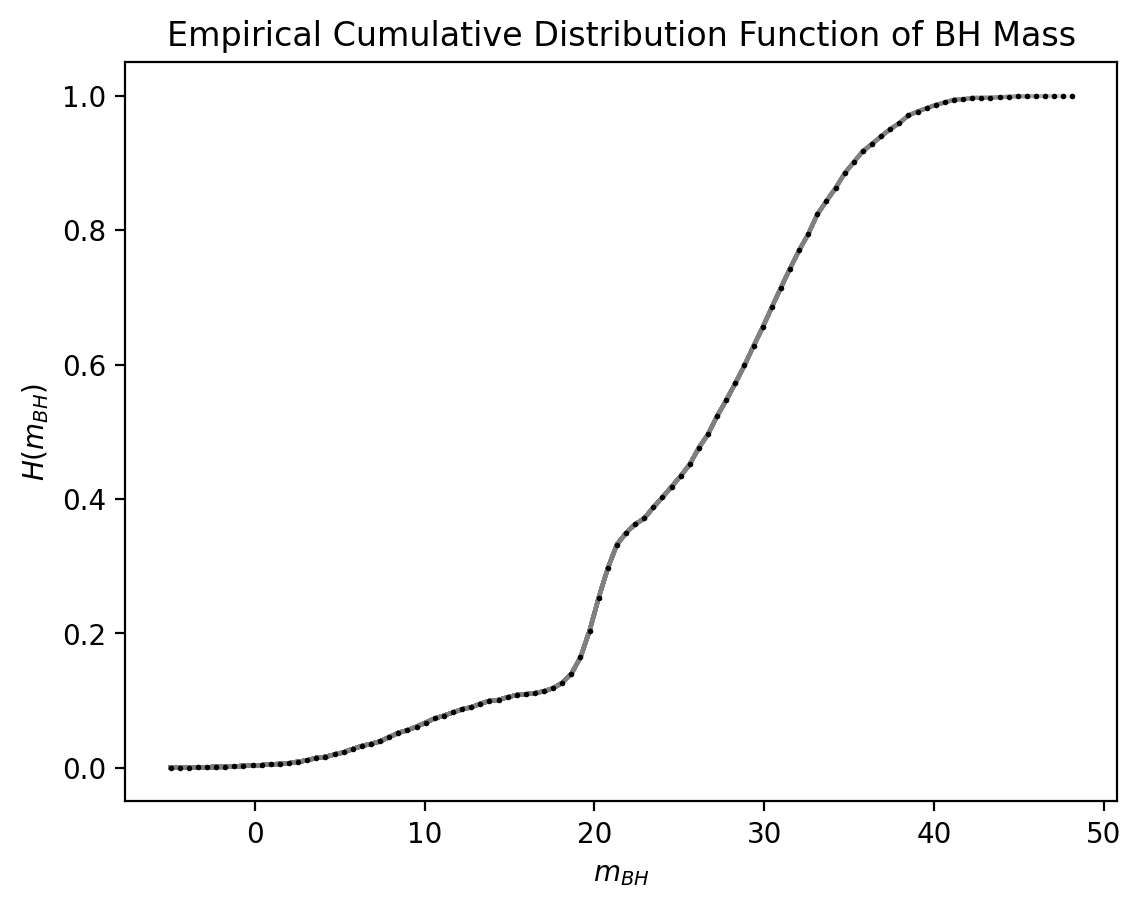

In [83]:
x_i = []
y_i = []

for i in range(ecdf.shape[0]):
    plt.scatter(x[i], np.sum(y[:i])/y_tot,s=1,color='k', zorder=1)
    x_i.append(x[i])
    y_i.append(np.sum(y[:i])/y_tot)
    plt.plot(x_i,y_i, color='gray', zorder=0, alpha=0.2)
    
plt.xlabel("$m_{BH}$")
plt.ylabel("$H(m_{BH})$")
plt.title("Empirical Cumulative Distribution Function of BH Mass")
plt.show()